## Script Content

# This script will contain
- 1 Import Procedures
- 1a Identifying What Variables to Use for Target Questions
- 2 Correlation Matrix, Maps and Interpretation
- 3 Scatterplots and Interpretation
- 4 Pair Plot and Interpretation
- 5 Categorical plot and Interpretation
- 6 Revisiting Target Questions and Defining Hypotheses

# 1 Import Procedures

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import os

In [4]:
#importing primary/sole dataset
df=pd.read_csv(r"C:\Users\Samth\CareerFoundry Projects\Achievement 6\1 Data\Manipulated Data\userapi_clean.csv")

# 1a Identifying Variables to Use for Target Questions

### The Target Questions
- What factors increase a profiles success on Lovoo?
- Do women with more profile visits have similar amounts of photos?
- Do women under 25 receive more profile visits/likes than those over 25?
* To answer these questions, we need variables such as photo count, profile visits/likes, and age. For the first question we can look at any available variables to determine if it improves a profile's success

In [5]:
#viewing dataset
df.head()

,Unnamed: 0,gender,genderLooking,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,lang_en,lang_de,lang_it,lang_es,lang_pt,verified,shareProfileEnabled,lastOnlineDate,lastOnlineTime,userId
0,0,F,M,25,1.00,4,8279,239,0,3,...,False,True,False,False,False,0,1,2015-04-25T20:43:26Z,1.429995e+09,55303fc3160ba0eb728b4575
1,1,F,M,22,0.85,5,663,13,0,0,...,False,True,True,False,False,0,1,2015-04-26T09:19:35Z,1.430040e+09,552e7b61c66da10d1e8b4c82
2,2,F,M,21,0.00,4,1369,88,0,2,...,False,False,False,False,False,0,1,2015-04-06T14:24:07Z,1.428330e+09,54a584ecc56da128638b4674
3,3,F,none,20,0.12,3,22187,1015,2,3,...,True,False,False,False,False,0,1,2015-04-07T11:21:01Z,1.428406e+09,54c92738076ea1b5338b4735
4,4,F,M,21,0.15,12,35262,1413,9,12,...,False,True,False,False,False,0,1,2015-04-06T14:25:20Z,1.428330e+09,54e1a6f6c76da135748b4a3a


In [18]:
#viewing columns data types
df.dtypes

Unnamed: 0                  int64
gender                     object
genderLooking              object
age                         int64
counts_details            float64
counts_pictures             int64
counts_profileVisits        int64
counts_kisses               int64
counts_fans                 int64
counts_g                    int64
flirtInterests_chat          bool
flirtInterests_friends       bool
flirtInterests_date          bool
country                    object
city                       object
location                   object
distance                  float64
isFlirtstar                 int64
isHighlighted               int64
isInfluencer                int64
isMobile                    int64
isNew                       int64
isOnline                    int64
isVip                       int64
lang_count                  int64
lang_fr                      bool
lang_en                      bool
lang_de                      bool
lang_it                      bool
lang_es       

In [34]:
#creating subset to drop unneeded columns or string columns
df2=df.drop(columns=['counts_g','lastOnlineDate','lastOnlineTime','gender','genderLooking','lang_en','lang_de','lang_it','lang_pt','userId','lang_fr','lang_es','country','city','location','distance','flirtInterests_chat','flirtInterests_friends','flirtInterests_date','isInfluencer','Unnamed: 0','shareProfileEnabled'])

In [29]:
#viewing new subset
df2.head()

,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,isFlirtstar,isHighlighted,isMobile,isNew,isOnline,isVip,lang_count,verified,shareProfileEnabled
0,25,1.00,4,8279,239,0,0,0,1,0,0,0,1,0,1
1,22,0.85,5,663,13,0,0,0,1,0,0,0,3,0,1
2,21,0.00,4,1369,88,0,0,0,0,0,1,0,0,0,1
3,20,0.12,3,22187,1015,2,0,0,0,0,0,0,2,0,1
4,21,0.15,12,35262,1413,9,0,0,0,0,1,0,1,0,1


# 2 Correlation Matrix, Maps and Interpretation

In [45]:
#creating correlation matrix for needed float int columns
df2.corr()

,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,isFlirtstar,isHighlighted,isMobile,isNew,isOnline,isVip,lang_count,verified
age,1.000000,-0.045991,-0.086094,-0.082209,-0.062078,0.025486,-0.008696,-0.008696,-0.067861,0.105873,0.191930,-0.030922,-0.022288,-0.096643
counts_details,-0.045991,1.000000,0.320267,0.138177,0.111581,0.079139,0.035670,0.035670,0.093330,-0.195946,-0.058807,0.079419,0.153248,0.223519
counts_pictures,-0.086094,0.320267,1.000000,0.406813,0.357202,0.089779,0.040309,0.040309,0.070570,-0.241824,-0.147012,0.074945,0.126634,0.229593
counts_profileVisits,-0.082209,0.138177,0.406813,1.000000,0.885067,0.126690,0.017020,0.017020,0.093048,-0.274286,-0.104701,0.025993,0.133280,0.197020
counts_kisses,-0.062078,0.111581,0.357202,0.885067,1.000000,0.118287,0.018444,0.018444,0.074420,-0.209199,-0.070659,0.024529,0.123695,0.155794
counts_fans,0.025486,0.079139,0.089779,0.126690,0.118287,1.000000,0.007425,0.007425,-0.037432,-0.015876,-0.026862,-0.000261,0.028887,0.021535
isFlirtstar,-0.008696,0.035670,0.040309,0.017020,0.018444,0.007425,1.000000,1.000000,-0.004348,0.012384,0.064838,0.014434,-0.004046,0.078773
isHighlighted,-0.008696,0.035670,0.040309,0.017020,0.018444,0.007425,1.000000,1.000000,-0.004348,0.012384,0.064838,0.014434,-0.004046,0.078773
isMobile,-0.067861,0.093330,0.070570,0.093048,0.074420,-0.037432,-0.004348,-0.004348,1.000000,-0.042839,-0.032461,0.029196,-0.003785,0.067672
isNew,0.105873,-0.195946,-0.241824,-0.274286,-0.209199,-0.015876,0.012384,0.012384,-0.042839,1.000000,0.243398,-0.075988,-0.120891,-0.147722


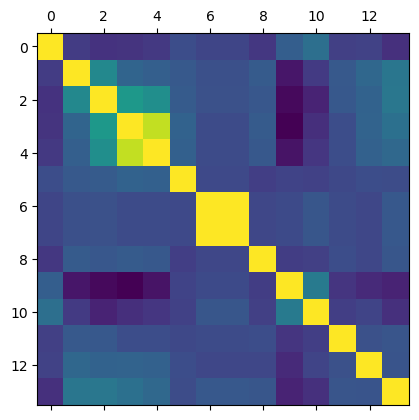

In [35]:
#creating correlation heatmap 
plt.matshow(df2.corr())
plt.show()

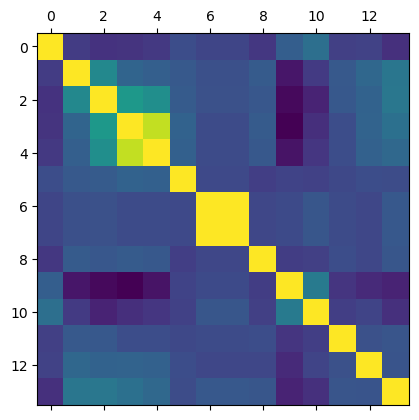

In [36]:
#saving image
plt.matshow(df2.corr())
plt.savefig("heatmap.png")

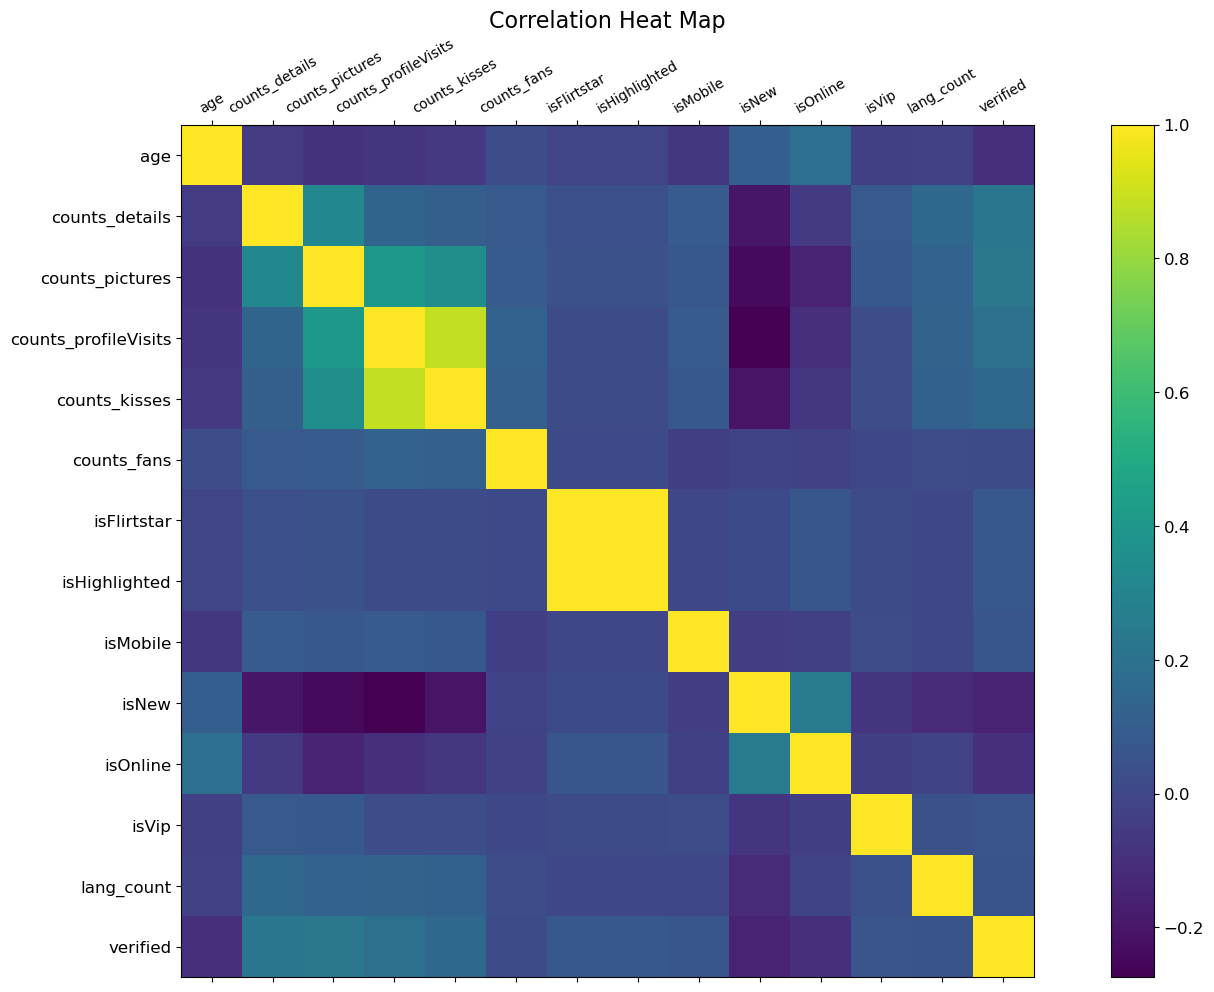

In [60]:
#adding labels, legend, changing size to complete view of heatmap
hm= plt.figure(figsize=(20,11)) #making complete view of heatmap
plt.matshow(df2.corr(),fignum=hm.number) #plot type
plt.xticks(range(df2.shape[1]),df2.columns,fontsize=10,rotation=30) # x labels
plt.yticks(range(df2.shape[1]),df2.columns,fontsize=12) #ylabel
hmcb= plt.colorbar() #create legend
hmcb.ax.tick_params(labelsize=12) #size
plt.title('Correlation Heat Map',fontsize=16) #title
hm.figure.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\3 Visualizations\correlation_heat_map.png'))

#### This correlation matrix heatmap shows us that there is a strong correlaton of 0.5 between "count_kisses" and "count_pictures", a correlation of 0.8 between "count_kisses" and "count_profileVisits" which can allow us to answer our question if individuals with more profile pictures have more profile visits or kisses from other users

# 3 Scatterplots and Interpretation

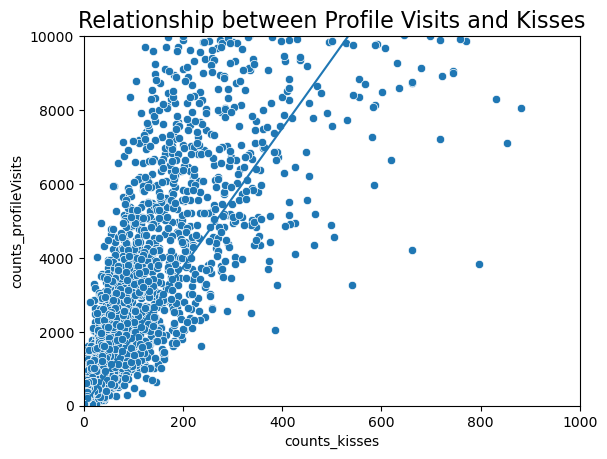

In [71]:
#creating a scatterplot for kisses and profile visits
sp=sns.scatterplot(x='counts_kisses',y='counts_profileVisits',data=df2)
plt.title ('Relationship between Profile Visits and Kisses',fontsize=16)#title
plt.xlim(0,1000)
plt.ylim(0,10000)
plt.plot([0,8000],[0,150000])
sp.figure.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\3 Visualizations\scatterplot_pvisit_kisses.png'))

### The scatterplot shows that there is a correlation between how many profile visits a person has and how many kisses/likes they receive. The figure is densely compacted at the bottom as many users receive that amount of likes, but it shows that there is a moderate to strong correlation between the variables

# 4 Pair Plots and Interpretation

In [72]:
#creating subset of subset
df3= df2[['counts_kisses','counts_profileVisits','age','counts_pictures']]

C:\Users\Samth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


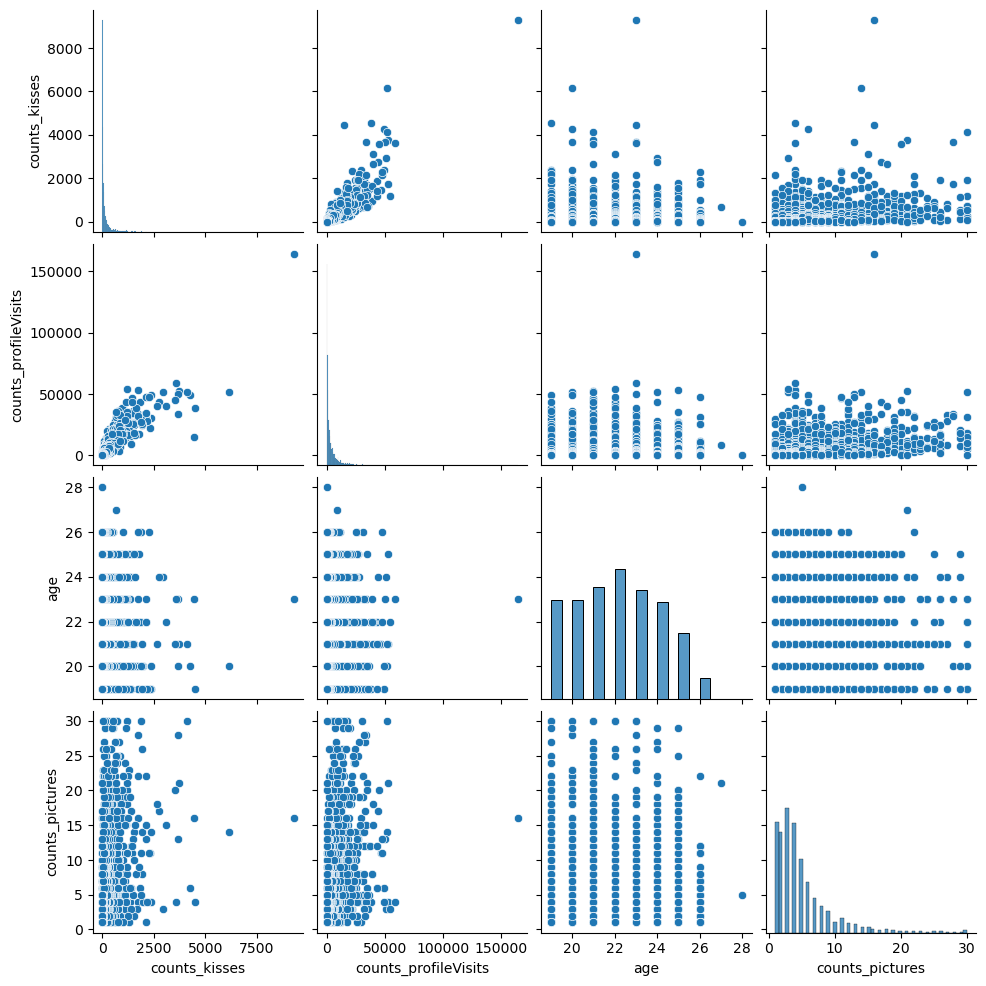

In [74]:
#creating pairplot
pp= sns.pairplot(df3)
pp.figure.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\3 Visualizations\pair_plots.png'))

### Our pairplots show that the variables counts_pictures and counts_profileVisits should be explored in some manner, however many of the graphs shown are oddly distributed and may benefit from a different form of data analysis.

# 5 Categorical Plots and Interpretation


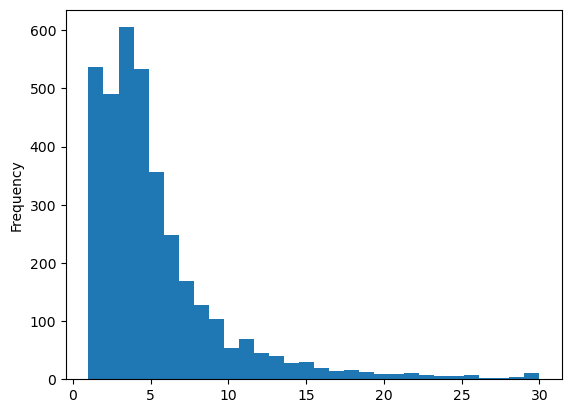

In [85]:
#creating histogram to determine bins
hg=df2['counts_pictures'].plot.hist(bins=30)
hg.figure.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\3 Visualizations\picture_histogram.png'))

In [110]:
#creating flag/variable
df2.loc[df2['counts_pictures'] < 5, 'Picture category'] = 'Low Pictures'

In [111]:
#creating flag/variable
df2.loc[(df2['counts_pictures'] >= 5) & (df2['counts_pictures'] < 10), 'Picture category'] = 'Average Pictures'

In [112]:
#creating flag/variable
df2.loc[df2['counts_pictures'] >= 10, 'Picture category'] = 'Many Pictures'

In [113]:
#dropping false values
df2['Picture category'].value_counts(dropna=False)

Picture category
Low Pictures        2166
Average Pictures    1006
Many Pictures        400
Name: count, dtype: int64

In [94]:
#viewing dataset with new flag
df2.head()

,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,isFlirtstar,isHighlighted,isMobile,isNew,isOnline,isVip,lang_count,verified,Picture category
0,25,1.00,4,8279,239,0,0,0,1,0,0,0,1,0,Average Pictures
1,22,0.85,5,663,13,0,0,0,1,0,0,0,3,0,Many Pictures
2,21,0.00,4,1369,88,0,0,0,0,0,1,0,0,0,Average Pictures
3,20,0.12,3,22187,1015,2,0,0,0,0,0,0,2,0,Average Pictures
4,21,0.15,12,35262,1413,9,0,0,0,0,1,0,1,0,Many Pictures


C:\Users\Samth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


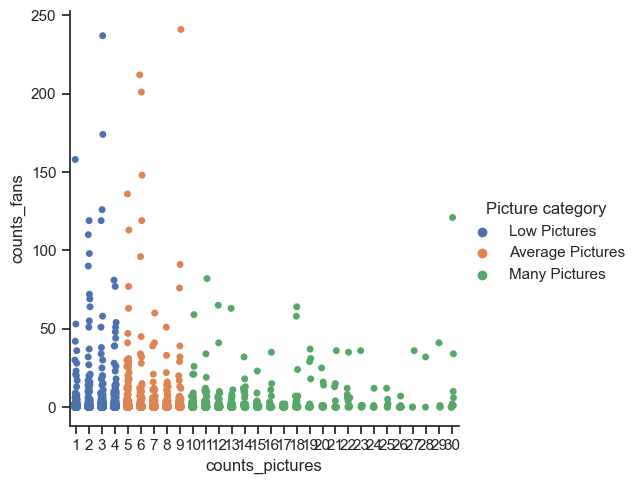

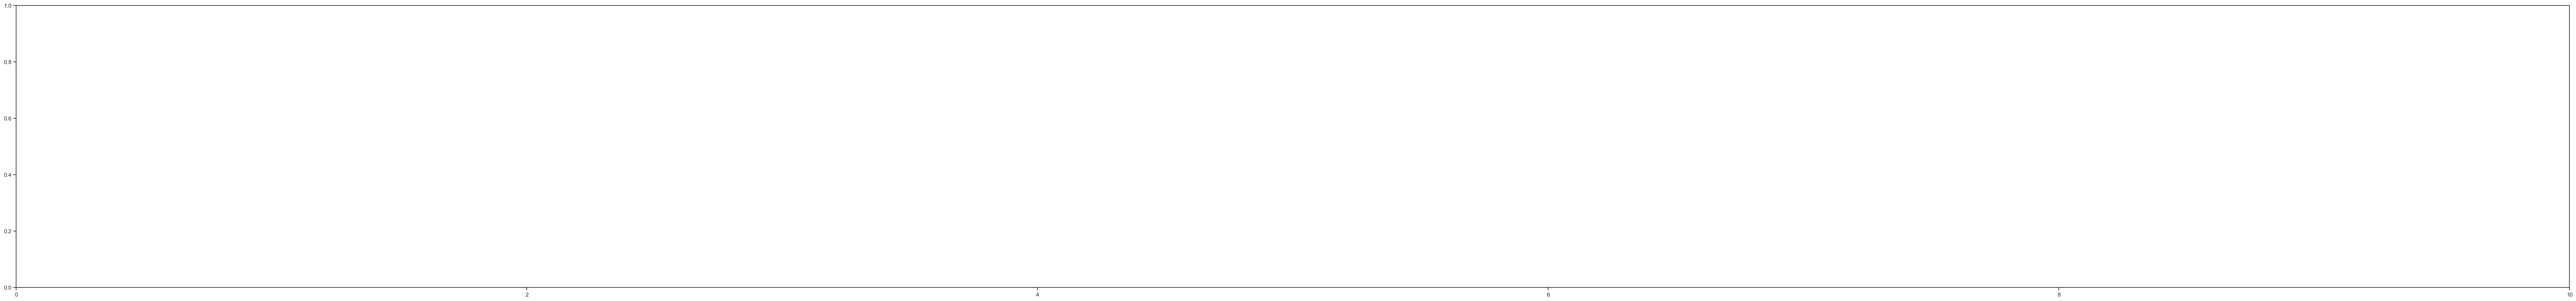

In [114]:
#creating categorical plot
sns.set(style="ticks")
cp = sns.catplot(x="counts_pictures", y="counts_fans", hue="Picture category", data=df2)
plt.figure(figsize=(90,10))
plt.xlim(0,10)
cp.figure.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\3 Visualizations\fans_pictures_cat_plot.png'))

### This categorical plot shows that individuals with less pictures are more likely to have more fans, this may be due to a air of mystery or intrigue around profiles that leave more to be wondered by users, and users may be more likely to follow a profile that will add more pictures later

# 6 Revisiting Target Questions and Hypothesis

### Based on our exploratory data analysis so far, we are unable to establish a solid answer to any of our target questions. I believe these questions can be answered once variables are compared. So far we know there is a definite relationship between amount of pictures on a profile, as well as amount of fans and profile visits. We also know there is a strong relationship between how many kisses a user receives and how many profile Visits they have. This may mean that a user is more likely to receive a like if someone visits their profile.